In [13]:
import numpy as np
import wave
from scipy import fromstring, int16
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import struct

In [2]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

In [22]:
def get_wavelet_img(wavfile, wave_time, freq_width, cmap):
    wr = wave.open(wavfile, "rb")
    print "\n\n"
    print "---------------------------------------------------------------"
    print wavfile.split('/')[-1].split('.')[0]
    print "Channel num : ", wr.getnchannels()
    print "Sample size : ", wr.getsampwidth()
    print "Sampling rate : ", wr.getframerate()
    print "Frame num : ", wr.getnframes()
    print "Prams : ", wr.getparams()
    print "Sec : ", float(wr.getnframes()) / wr.getframerate()
    data = wr.readframes(wr.getnframes())
    num_data = fromstring(data, dtype = int16)
    if (wr.getnchannels() == 2):
        left = num_data[::2]
        right = num_data[1::2]
    elif  wr.getnchannels() == 1:
        left = num_data
    else:
        return
    wr.close()
    sample_late = float(wr.getframerate())
    T = int(sample_late * wave_time)
    widths = np.arange(freq_width[0] , freq_width[1] + 1)
    start = time.time()
    cwtmatr = signal.cwt(left, signal.ricker, widths)
    elapsed_time = time.time() - start
    print "Frequency Width :: " + str(freq_width[0]) + " to " + str(freq_width[1]) + "[Hz]"
    print "Sampling Rate :: " + str(sample_late)
    print "Wave Width :: " + str(T/sample_late) + "[s]"
    print ("elapsed_time:{0}".format(elapsed_time)) + "[sec]"
    print cwtmatr.shape
    df = pd.DataFrame(cwtmatr)
    
    x = range(T)
    y = left.astype(np.float32)
    plt.figure(figsize=(10, 5))
    plt.imshow(cwtmatr, extent=[0, T/sample_late, freq_width[0], freq_width[1]+1], cmap=cmap, aspect='auto', \
               vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.axis('off')
    plt.savefig('./imgs/' + wavfile.split('/')[-1].split('.')[0]+'.png')
    print "---------------------------------------------------------------"
    print "\n\n"




---------------------------------------------------------------
ambient
Channel num :  2
Sample size :  2
Sampling rate :  44100
Frame num :  1323000
Prams :  (2, 2, 44100, 1323000, 'NONE', 'not compressed')
Sec :  30.0
Frequency Width :: 1 to 1000[Hz]
Sampling Rate :: 44100.0
Wave Width :: 0.1[s]
elapsed_time:0.836292028427[sec]
(1000, 4410)
---------------------------------------------------------------






---------------------------------------------------------------
techno
Channel num :  2
Sample size :  2
Sampling rate :  44100
Frame num :  4410000
Prams :  (2, 2, 44100, 4410000, 'NONE', 'not compressed')
Sec :  100.0
Frequency Width :: 1 to 1000[Hz]
Sampling Rate :: 44100.0
Wave Width :: 0.1[s]
elapsed_time:0.842312097549[sec]
(1000, 4410)
---------------------------------------------------------------






---------------------------------------------------------------
black
Channel num :  2
Sample size :  2
Sampling rate :  44100
Frame num :  1323000
Prams :  (2, 2, 441

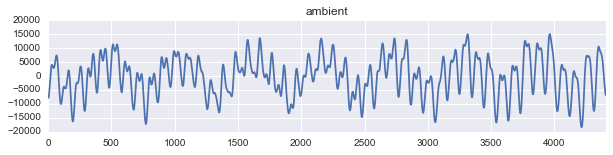

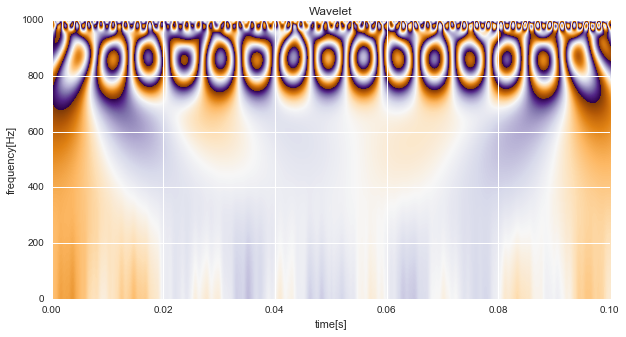

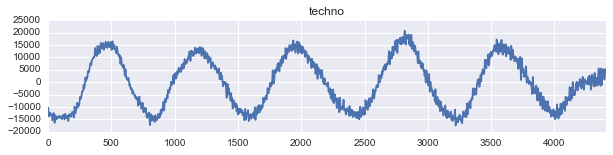

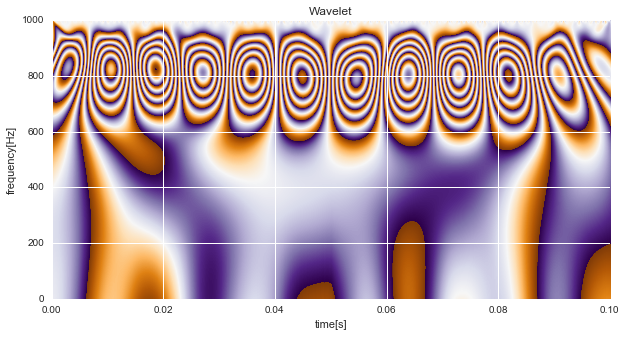

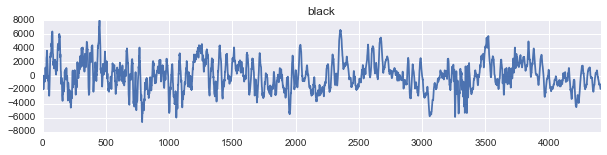

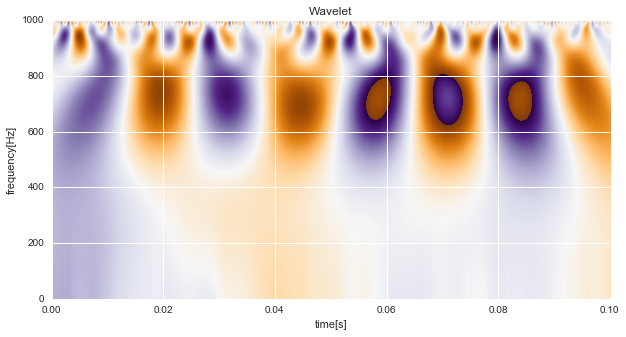

In [13]:
get_wavelet_img("./ambient.wav", 0.1, [1, 1000], 'PuOr')
get_wavelet_img("./techno.wav", 0.1, [1, 1000], 'PuOr')
get_wavelet_img("./black.wav", 0.1, [1, 1000], 'PuOr')

In [ ]:
import glob
waves = glob.glob('./wavs/*.wav')
for wavfile in waves:
    get_wavelet_img(wavfile, 0.1,  [1, 501], 'PuOr')




---------------------------------------------------------------
0
Channel num :  1
Sample size :  2
Sampling rate :  11025
Frame num :  800
Prams :  (1, 2, 11025, 800, 'NONE', 'not compressed')
Sec :  0.0725623582766
Frequency Width :: 1 to 501[Hz]
Sampling Rate :: 11025.0
Wave Width :: 0.0999546485261[s]
elapsed_time:0.201328992844[sec]
(501, 800)
---------------------------------------------------------------






---------------------------------------------------------------
1
Channel num :  1
Sample size :  2
Sampling rate :  11025
Frame num :  800
Prams :  (1, 2, 11025, 800, 'NONE', 'not compressed')
Sec :  0.0725623582766
Frequency Width :: 1 to 501[Hz]
Sampling Rate :: 11025.0
Wave Width :: 0.0999546485261[s]
elapsed_time:0.19283413887[sec]
(501, 800)
---------------------------------------------------------------






---------------------------------------------------------------
10
Channel num :  1
Sample size :  2
Sampling rate :  11025
Frame num :  800
Prams :  (1, 2,

In [20]:
def split_wav(wavfile, split_count):
    wr = wave.open(wavfile, "rb")
    print "\n\n"
    print "---------------------------------------------------------------"
    print wavfile.split('/')[-1].split('.')[0]
    print "Channel num : ", wr.getnchannels()
    print "Sample size : ", wr.getsampwidth()
    print "Sampling rate : ", wr.getframerate()
    print "Frame num : ", wr.getnframes()
    print "Prams : ", wr.getparams()
    print "Sec : ", float(wr.getnframes()) / wr.getframerate()
    data = wr.readframes(wr.getnframes())
    num_data = fromstring(data, dtype = int16)
    if (wr.getnchannels() == 2):
        left = num_data[::2]
        right = num_data[1::2]
    elif  wr.getnchannels() == 1:
        left = num_data
    else:
        return
    wr.close()
    sample_late = float(wr.getframerate())
    points = wr.getnframes()
    T = int(points / split_count)
    start_pos = 0
    for i in range(T):
        w = wave.Wave_write("./wavs/"+str(i)+".wav")
        w.setnchannels(1)
        w.setsampwidth(2)
        w.setframerate(sample_late)
        data = left[start_pos:start_pos+split_count]
        data = struct.pack("h" * len(data), *data)
        w.writeframes(data)
        w.close()
        start_pos = start_pos + split_count

In [21]:
split_wav('oya.wav', 800)




---------------------------------------------------------------
oya
Channel num :  2
Sample size :  2
Sampling rate :  11025
Frame num :  1102500
Prams :  (2, 2, 11025, 1102500, 'NONE', 'not compressed')
Sec :  100.0
